In [5]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [6]:
#Import the Dataset
data = pd.read_csv("iphone_purchase_records.csv")

In [7]:
#Check the shape
data.shape

(400, 4)

In [8]:
#Load the Dataset
data.head()

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [9]:
#Get dataset Status
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   Salary           400 non-null    int64 
 3   Purchase Iphone  400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [11]:
#Remove unused Dataset
data = data.drop('Gender',axis=1)

In [12]:
#Check the new data columns
data.head()

,Age,Salary,Purchase Iphone
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


<Axes: >

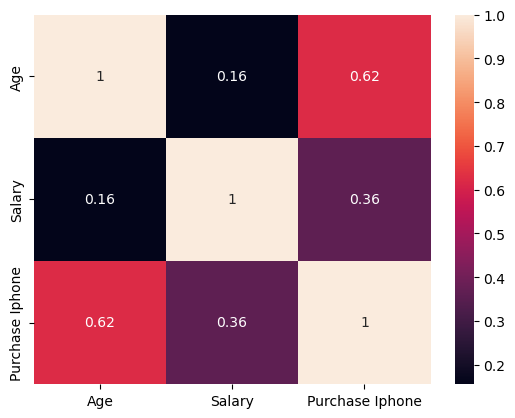

In [13]:
#Load the data graphically
cm = data.corr()
sns.heatmap(cm,annot=True)

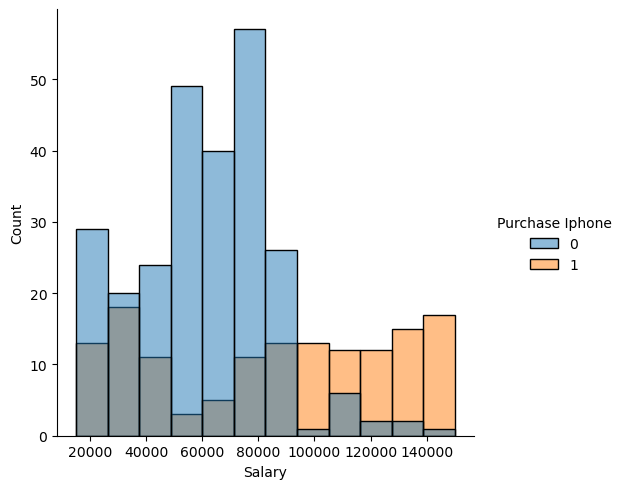

In [14]:
#Load the data graphically
sns.displot(data,x='Salary',hue='Purchase Iphone')

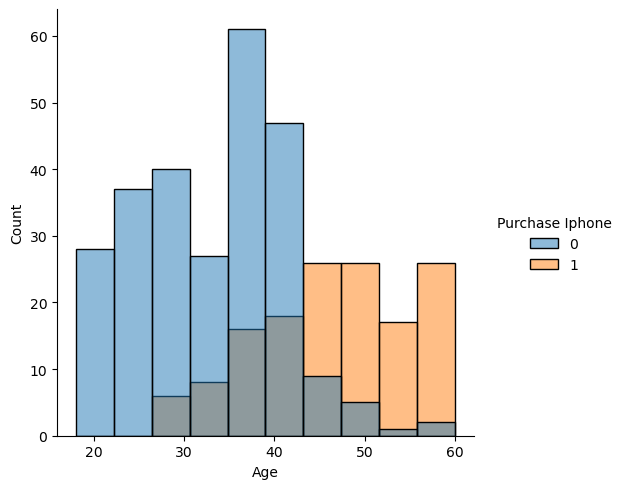

In [15]:
#Load the data graphically
sns.displot(data,x='Age',hue='Purchase Iphone')

In [19]:
#Create Function for representation the distance
def eucliden_distance(p1,p2):
    distance = np.sqrt(np.sum(p1-p2) **2)
    return distance

a = np.array([3,4])
b = np.array([5,9])
print(eucliden_distance(1,b))

12.0


In [20]:
#Create a Axis for model
x = data.drop('Purchase Iphone',axis=1)
y = data['Purchase Iphone']

In [21]:
#Check the dataset colums
x.head()

,Age,Salary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


In [22]:
#Train the Model
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=11)

In [24]:
#Check the Shape Of data
x_train.shape

(320, 2)

In [25]:
#Check the Shape Of data
x_test.shape

(80, 2)

In [27]:
#Check the Shape Of data
y_train.shape

(320,)

In [28]:
#Check the Shape Of data
y_test.shape

(80,)

In [29]:
#create the model scale
model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train,y_train)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [30]:
#Get the prediction data
y_prediction = model.predict(x_test)
y_prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0])

In [31]:
#Check the Accuracy of the model
accuracy_score(y_test,y_prediction)

0.7625

In [ ]:
import joblib
#Save the model
joblib.dump(model,'model.joblib')